## Clothing insulation level: Count data

### Binomial distribution

In [143]:
## Importing and visualizing data
setwd("~/Desktop/DTU/Advanced\ Dataanalysis\ and\ Statistical\ Modelling/Assignments/Assignment\ 2")
data <- read.table("dat_count.csv", sep = ";",  header = TRUE)
summary(data)
options(repr.plot.width=10, repr.plot.height=10)

     subjId           day             clo              time      
 Min.   : 11.0   Min.   :1.000   Min.   :0.0000   Min.   :1.533  
 1st Qu.: 59.0   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:6.650  
 Median : 99.0   Median :2.000   Median :0.0000   Median :6.717  
 Mean   :101.1   Mean   :1.978   Mean   :0.5809   Mean   :6.617  
 3rd Qu.:141.0   3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:6.767  
 Max.   :199.0   Max.   :4.000   Max.   :4.0000   Max.   :7.150  
      nobs           sex          tOut           tInOp      
 Min.   :1.000   female:70   Min.   :11.93   Min.   :23.11  
 1st Qu.:5.000   male  :66   1st Qu.:18.57   1st Qu.:26.01  
 Median :5.000               Median :21.01   Median :26.94  
 Mean   :4.904               Mean   :21.54   Mean   :26.82  
 3rd Qu.:5.000               3rd Qu.:24.25   3rd Qu.:27.48  
 Max.   :5.000               Max.   :33.08   Max.   :29.55  

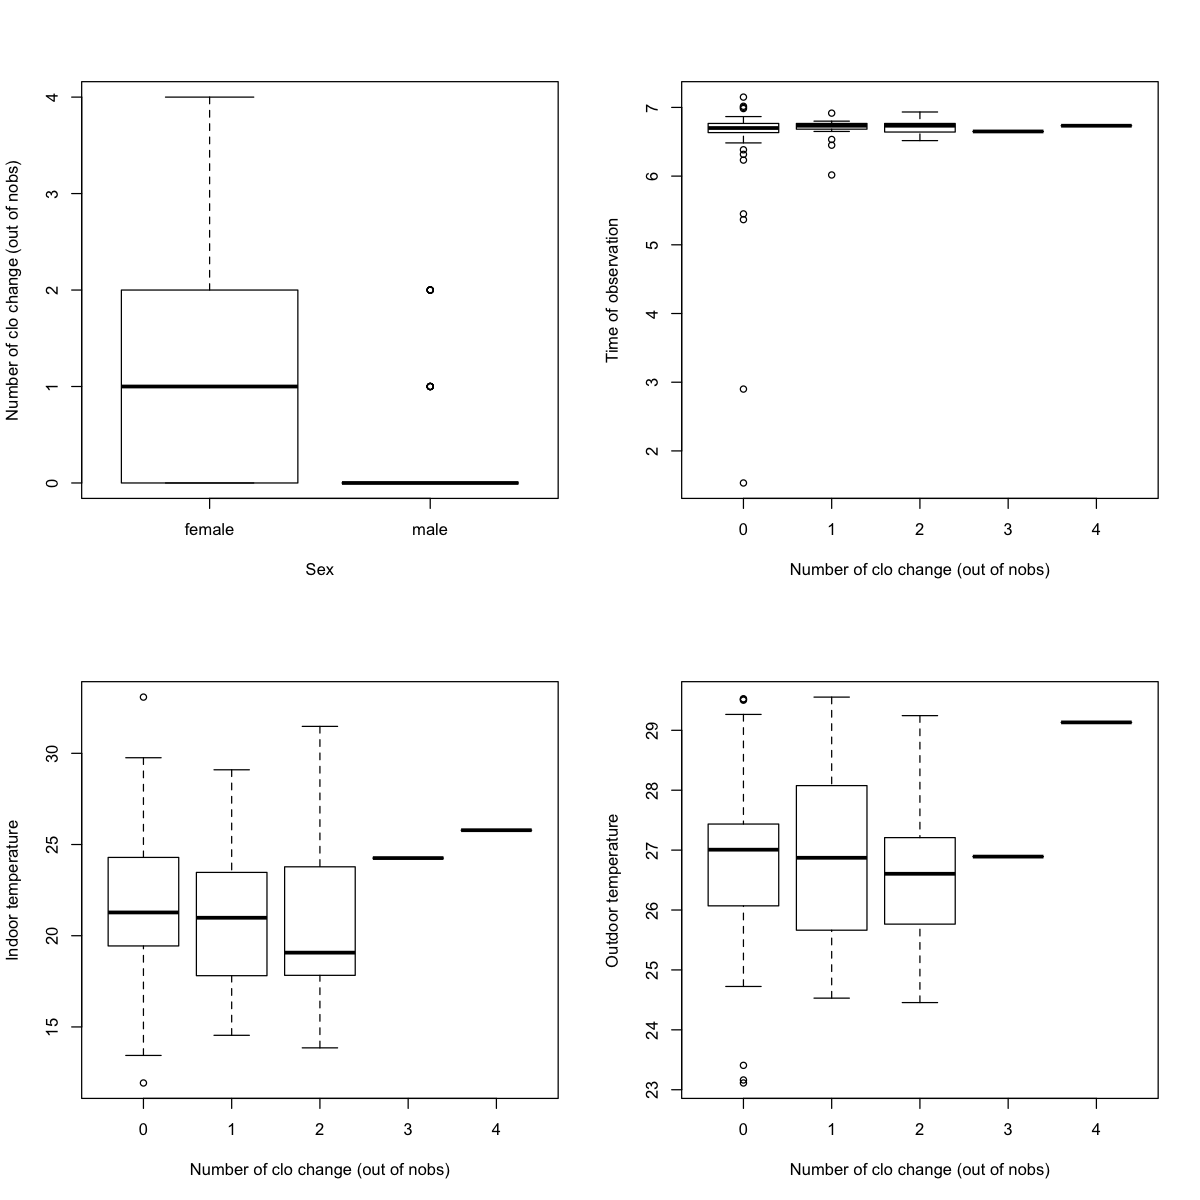

In [144]:
par(mfrow=c(2,2))
boxplot(data$clo~data$sex, xlab='Sex', ylab='Number of clo change (out of nobs)')
boxplot(data$time~data$clo, xlab='Number of clo change (out of nobs)', ylab='Time of observation')
boxplot(data$tOut~data$clo, xlab='Number of clo change (out of nobs)', ylab='Indoor temperature')
boxplot(data$tInOp~data$clo, xlab='Number of clo change (out of nobs)', ylab='Outdoor temperature')

In [145]:
data$sex <- as.factor(data$sex)
data$resp <- cbind(data$clo, (data$nobs - data$clo))
fit <- glm(resp ~ sex * tOut * tInOp * time,
            family = binomial,
            data = data)

In [146]:
# Goodness of fit test
summary(fit)
(pval <- 1 - pchisq(160.02, 120))
## So the assumption is rejected, Hence overdispersion


Call:
glm(formula = resp ~ sex * tOut * tInOp * time, family = binomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7334  -1.0484  -0.6004   0.3326   2.7008  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)              1.496e+02  8.872e+02   0.169    0.866
sexmale                  4.015e+02  1.529e+03   0.263    0.793
tOut                     2.454e+00  4.670e+01   0.053    0.958
tInOp                   -6.730e+00  3.334e+01  -0.202    0.840
time                    -2.179e+01  1.313e+02  -0.166    0.868
sexmale:tOut            -1.787e+01  8.345e+01  -0.214    0.830
sexmale:tInOp           -1.784e+01  6.027e+01  -0.296    0.767
tOut:tInOp              -3.463e-02  1.723e+00  -0.020    0.984
sexmale:time            -6.110e+01  2.269e+02  -0.269    0.788
tOut:time               -4.409e-01  6.906e+00  -0.064    0.949
tInOp:time               9.803e-01  4.937e+00   0.199    0.843
sexmale:tOut:tInOp     

[1] 0.00857264

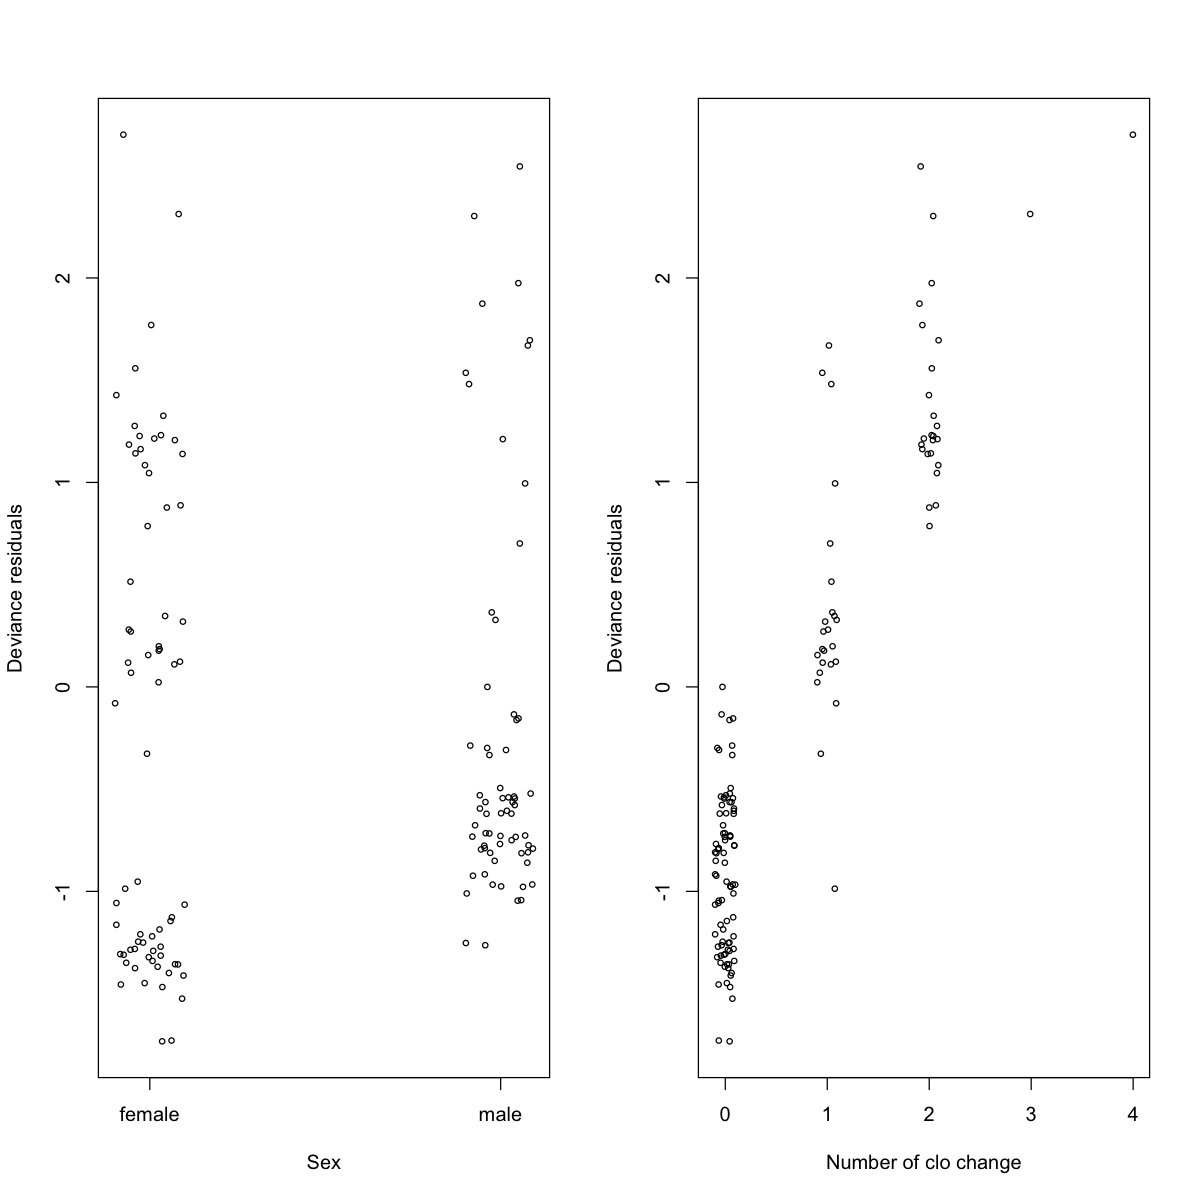

In [147]:
par(mfrow=c(1,2))
resDev <- residuals(fit,type="deviance")
plot(jitter(as.numeric(data$sex), amount=0.1), resDev,
     xlab="Sex", ylab="Deviance residuals", cex=0.6,
     axes=FALSE)
box()
axis(1,label=c("female", "male" ),at=c(1,2))
axis(2)
plot(jitter(as.numeric(data$clo),
            amount=0.1), resDev, xlab= "Number of clo change" ,
     ylab="Deviance residuals", cex=0.6, axes=FALSE)
box()
axis(1,label=c(0:4),at=c(0,1,2,3,4))
axis(2)
## Doesn't seems to be systematic effects here


Call:
glm(formula = resp ~ sex * tOut * tInOp * time, family = quasibinomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7334  -1.0484  -0.6004   0.3326   2.7008  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)
(Intercept)              1.496e+02  1.052e+03   0.142    0.887
sexmale                  4.015e+02  1.813e+03   0.221    0.825
tOut                     2.454e+00  5.539e+01   0.044    0.965
tInOp                   -6.730e+00  3.954e+01  -0.170    0.865
time                    -2.179e+01  1.558e+02  -0.140    0.889
sexmale:tOut            -1.787e+01  9.898e+01  -0.181    0.857
sexmale:tInOp           -1.784e+01  7.148e+01  -0.250    0.803
tOut:tInOp              -3.463e-02  2.044e+00  -0.017    0.987
sexmale:time            -6.110e+01  2.691e+02  -0.227    0.821
tOut:time               -4.409e-01  8.191e+00  -0.054    0.957
tInOp:time               9.803e-01  5.856e+00   0.167    0.867
sexmale:tOut:tInOp

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

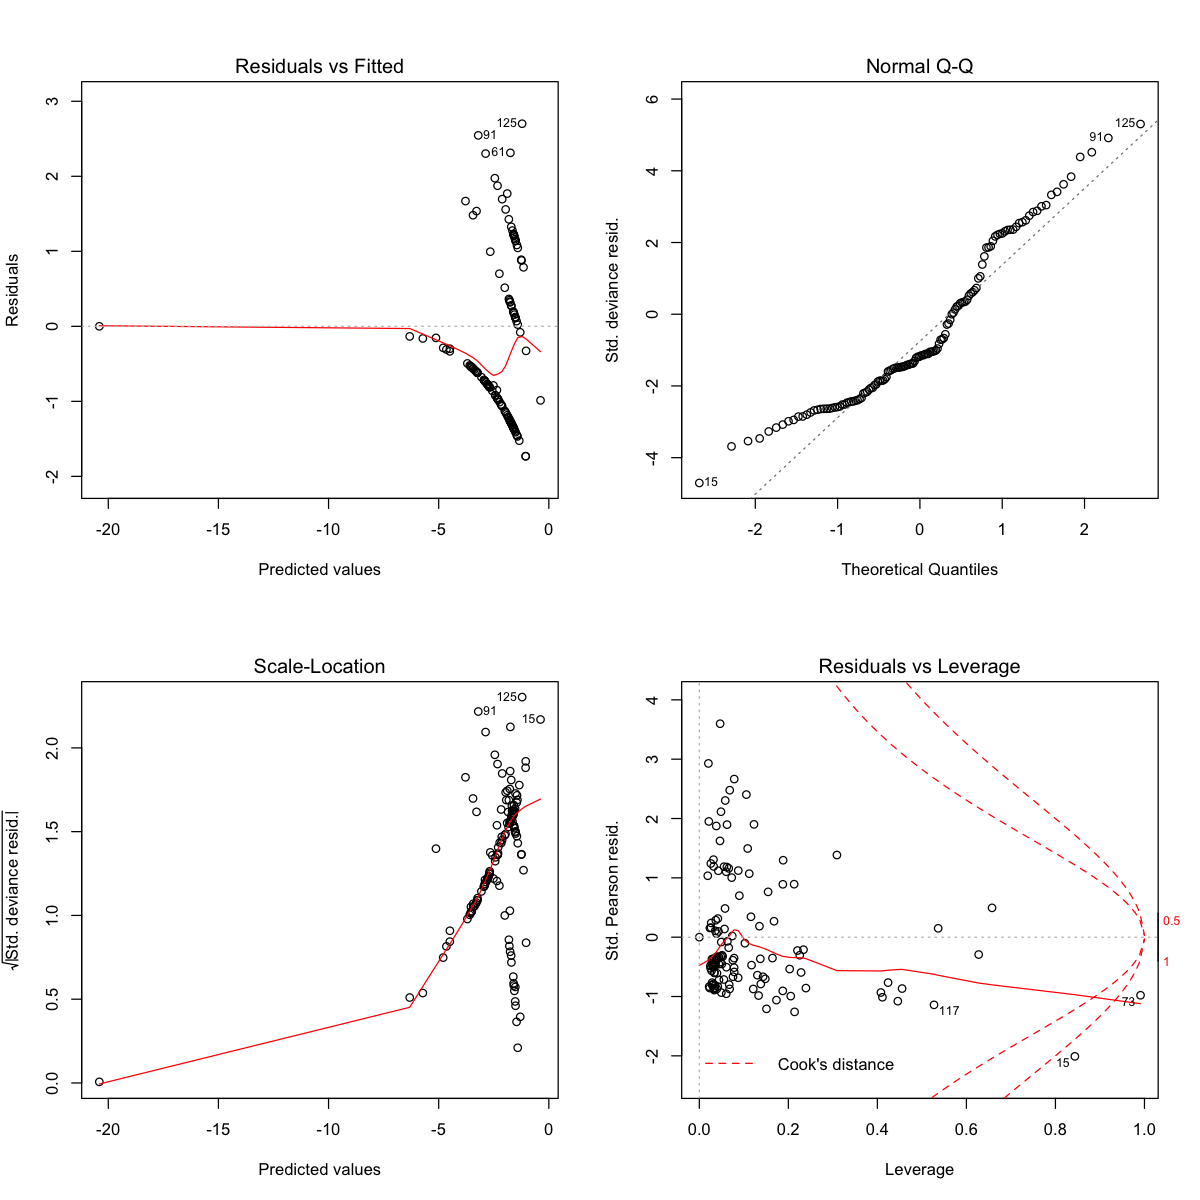

In [148]:
# Including overdispersion
fit_disp <- glm(resp ~ sex * tOut * tInOp * time,
            family = quasibinomial,
            data = data)
summary(fit_disp)
par(mfrow=c(2,2))
plot(fit_disp)

In [176]:
## Model reduction
drop1(fit_disp, test = "F")
fit_disp_1<-update(fit_disp,~. -sex:tOut:tInOp:time)
summary(fit_disp_1)

# drop1(fit_disp_1, test = "F")
fit_disp_2<-update(fit_disp_1,~. -tOut:tInOp:time)
# summary(fit_disp_2)

# drop1(fit_disp_2, test = "F")
fit_disp_3<-update(fit_disp_2,~. -sex:tOut:time)
# summary(fit_disp_3)

# drop1(fit_disp_3, test = "F")
fit_disp_4<-update(fit_disp_3,~. -sex:tInOp:time)
# summary(fit_disp_4)

# drop1(fit_disp_4, test = "F")
fit_disp_5<-update(fit_disp_4,~. -sex:tOut:tInOp)
# summary(fit_disp_5)

# drop1(fit_disp_5, test = "F")
fit_disp_6<-update(fit_disp_5,~. -tOut:tInOp)
# summary(fit_disp_6)

# drop1(fit_disp_6, test = "F")
fit_disp_7<-update(fit_disp_6,~. -sex:tOut)
# summary(fit_disp_7)

# drop1(fit_disp_7, test = "F")
fit_disp_8<-update(fit_disp_7,~. -tOut:time)
# summary(fit_disp_8)

# drop1(fit_disp_8, test = "F")
fit_disp_9<-update(fit_disp_8,~. -tInOp:time)
# summary(fit_disp_9)

# drop1(fit_disp_9, test = "F")
fit_disp_10<-update(fit_disp_9,~. -sex:time)
# summary(fit_disp_10)

# drop1(fit_disp_10, test = "F")
fit_disp_11<-update(fit_disp_10,~. -sex:tInOp)
# summary(fit_disp_11)

# drop1(fit_disp_11, test = "F")
fit_disp_12<-update(fit_disp_11,~. -tOut)
# summary(fit_disp_12)

# drop1(fit_disp_12, test = "F")
fit_disp_13<-update(fit_disp_12,~. -tInOp)
# summary(fit_disp_13)

drop1(fit_disp_13, test = "F")
fit_disp_14<-update(fit_disp_13,~. -time)

,Df,Deviance,F value,Pr(>F)
<none>,NA,160.0215,NA,NA
sex:tOut:tInOp:time,1,160.0802,0.04400667,0.8341969



Call:
glm(formula = resp ~ sex + tOut + tInOp + time + sex:tOut + sex:tInOp + 
    tOut:tInOp + sex:time + tOut:time + tInOp:time + sex:tOut:tInOp + 
    sex:tOut:time + sex:tInOp:time + tOut:tInOp:time, family = quasibinomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7199  -1.0601  -0.5994   0.3488   2.6903  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)        260.91634  895.94944   0.291    0.771
sexmale             33.84735  325.52736   0.104    0.917
tOut                -3.44800   47.02889  -0.073    0.942
tInOp              -10.87997   33.73711  -0.322    0.748
time               -38.25115  132.67252  -0.288    0.774
sexmale:tOut         2.47415    6.42973   0.385    0.701
sexmale:tInOp       -3.44159   15.14815  -0.227    0.821
tOut:tInOp           0.18353    1.73351   0.106    0.916
sexmale:time        -6.55327   48.04703  -0.136    0.892
tOut:time            0.43218    6.95453   0.062    0.9

,Df,Deviance,F value,Pr(>F)
<none>,NA,172.2697,NA,NA
sex,1,192.4358,15.5691794,0.0001281654
time,1,172.5717,0.2331919,0.6299610140


In [150]:
summary(fit_disp_14)


Call:
glm(formula = resp ~ sex, family = quasibinomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3735  -0.7849  -0.7849   0.1631   3.0756  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5721     0.1645  -9.557  < 2e-16 ***
sexmale      -1.1839     0.3199  -3.701 0.000312 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 1.344379)

    Null deviance: 193.66  on 135  degrees of freedom
Residual deviance: 172.57  on 134  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


In [151]:
## Interpretation of parameters
par <- coef(fit_disp_14)
par

std<-sqrt(diag(vcov(fit_disp_14)))
std

(Intercept)     sexmale 
  -1.572082   -1.183922

(Intercept)     sexmale 
  0.1644936   0.3198611

#### Looking at the parameters and their standard deviation, we focus of the sex.

In [177]:
## CI of parameters (Using t-dist)
par+std%o%c(lower=-1,upper=1)*qt(0.975,19)

## CI of parameters (Using normal dist)
confint.default(fit_disp_14)
# or with profile likelihood
confint(fit_disp_14) ## profile likelihood based

,lower,upper
(Intercept),-1.916371,-1.2277930
sexmale,-1.853400,-0.5144454


,2.5 %,97.5 %
(Intercept),-1.894484,-1.2496806
sexmale,-1.810839,-0.5570062


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-1.906695,-1.2602771
sexmale,-1.843866,-0.5810308


#### Above we have the confidence intervals for the reduce model's paraemters.

In [178]:
# Odds ratio
exp(coef(fit_disp_14)[2])
exp(confint(fit_disp_14)[2, ]) ## 95% confidence interval

sexmale 
0.3060758

Waiting for profiling to be done...


2.5 %    97.5 % 
0.1582046 0.5593215

#### The odd between males and females is ~0.31. So, the odds of changing the level of clothing if you are male is ~0.31 compared to if you were a female. 

In [154]:
## Check for the expressed variance for each variable in the model
anova(fit_disp_14, test='Chisq')
anova(fit_disp, test='Chisq')

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,135,193.6550,NA
sex,1,21.0833,134,172.5717,7.491186e-05


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,135,193.6550,NA
sex,1,2.108330e+01,134,172.5717,0.0001082531
tOut,1,2.062808e-03,133,172.5697,0.9694541835
tInOp,1,2.097391e-01,132,172.3599,0.6994039963
time,1,3.350408e-01,131,172.0249,0.6255360058
sex:tOut,1,5.083251e-02,130,171.9741,0.8492386517
sex:tInOp,1,4.203380e+00,129,167.7707,0.0838855680
tOut:tInOp,1,3.717629e-01,128,167.3989,0.6072037503
sex:time,1,3.466865e+00,127,163.9320,0.1164511229
tOut:time,1,2.764884e-01,126,163.6556,0.6575272660


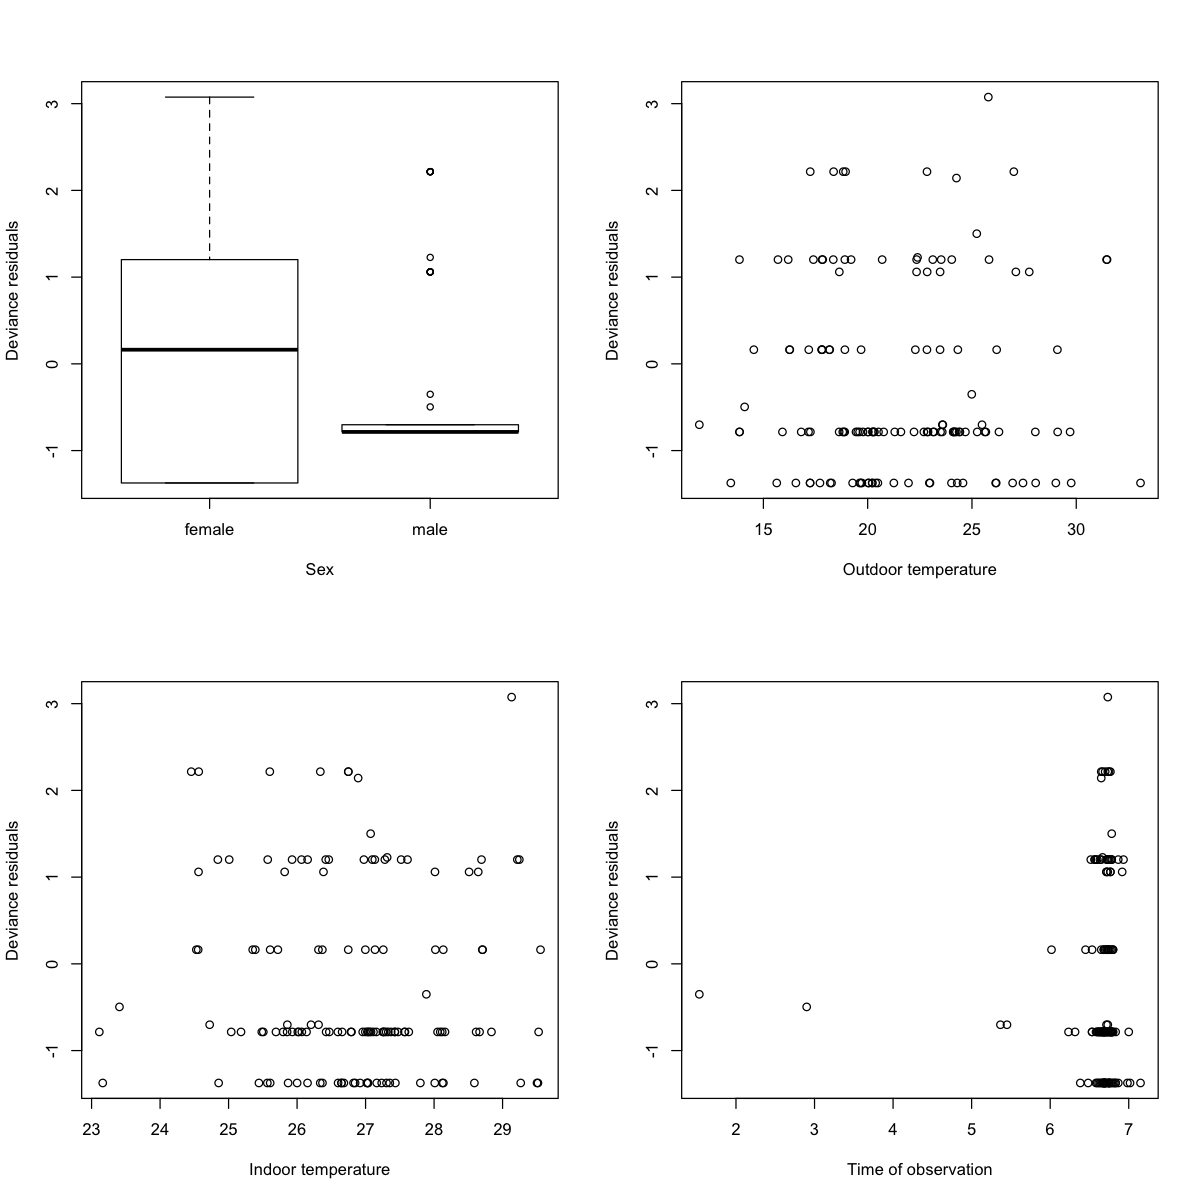

In [155]:
## Residual diagnostic on the model 
types <- c('deviance', 'pearson')
Rd<-residuals(fit_disp_14,type=types[1])

par(mfrow=c(2,2))
plot(data$sex,Rd, xlab='Sex', ylab='Deviance residuals')
plot(data$tOut,Rd, xlab='Outdoor temperature', ylab='Deviance residuals')
plot(data$tInOp,Rd, xlab='Indoor temperature', ylab='Deviance residuals')
plot(data$time,Rd, xlab='Time of observation', ylab='Deviance residuals')

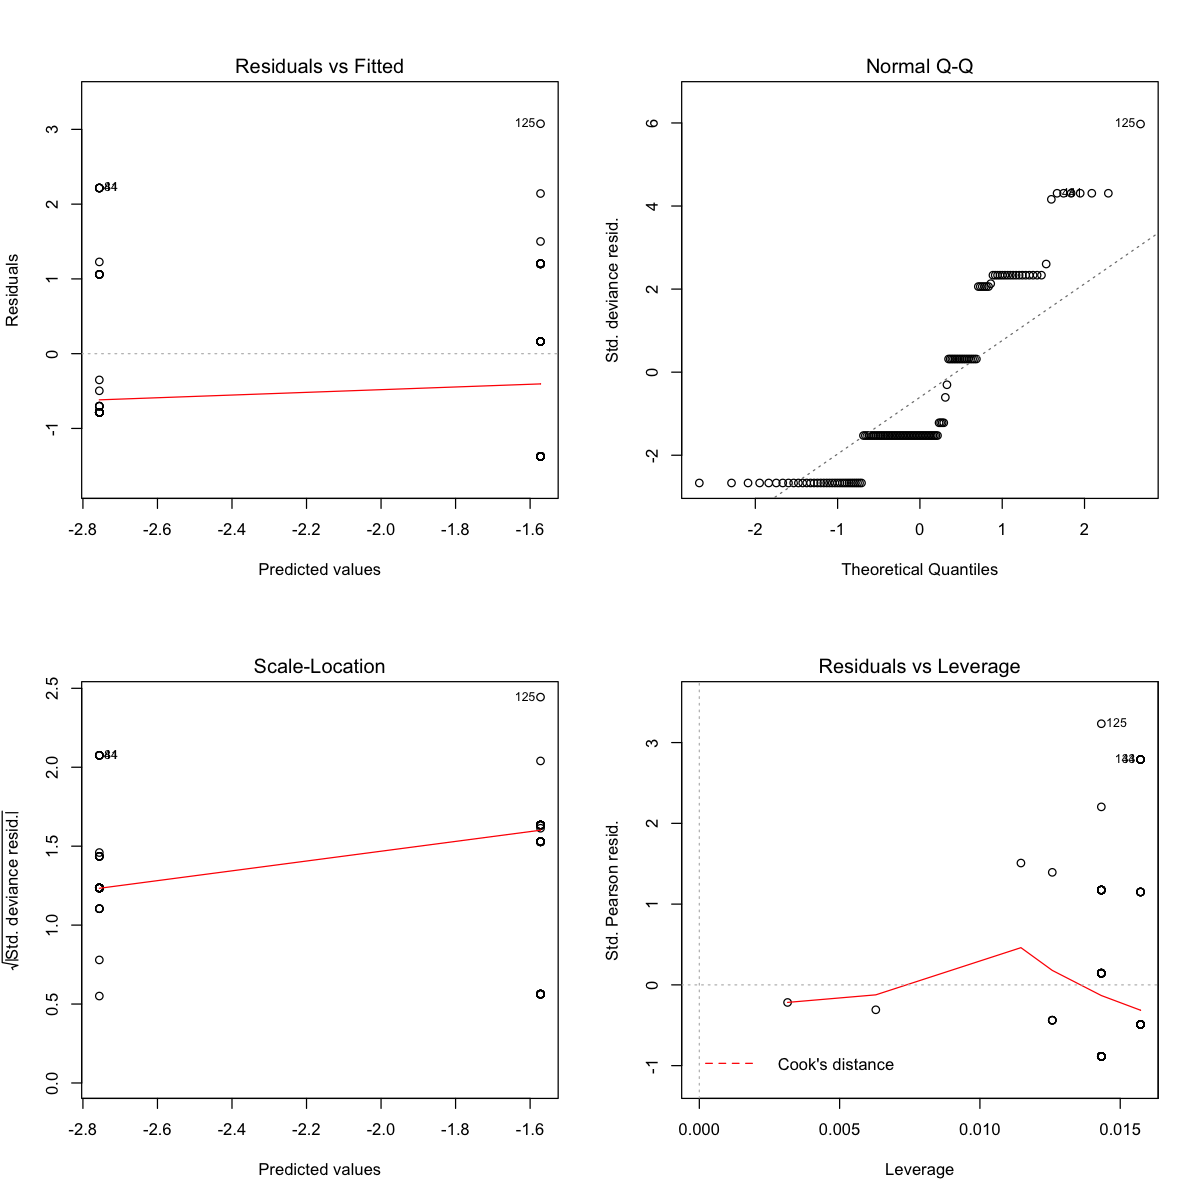

In [156]:
par(mfrow=c(2,2))
plot(fit_disp_14)

#### Considering that the number of observations is small (i.e ranging from 1 to 5), we can not expect a nice alignment along the straight line for model's residuals (i.e proving the normal distribution of residuals).
#### The model comprises of just 2 levels of prediction (i.e males and females), than vary based on the number of observations.

#### Model results
1. Probability of changing the clothing level (exp(-1.572) / (1 + exp(-1.572))) ~ 17.193% for females.
2. Probability of changing the clothing level (exp(-1.572-1.184) / (1 + exp(-1.572-1.184))) ~ 5.975% for males.
3. The odds ration becomes odds(clo | sexmale) / odds(clo | sexfemale) = 0.306, with a confidence interval [0.158,0.559].

## Poisson distribution

In [248]:
fit_pois<-glm(clo~offset(log(nobs))+time*sex*tOut*tInOp,family=quasipoisson,data=data)
## Note the included offset.
anova(fit_pois,test= "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,135,168.3399,NA
time,1,1.104974e+00,134,167.2349,0.3457471118
sex,1,1.788135e+01,133,149.3536,0.0001488729
tOut,1,7.043896e-03,132,149.3465,0.9399915403
tInOp,1,2.043280e-01,131,149.1422,0.6851449638
time:sex,1,3.126341e+00,130,146.0159,0.1127467679
time:tOut,1,8.546449e-02,129,145.9304,0.7931504246
sex:tOut,1,3.670982e-02,128,145.8937,0.8635499739
time:tInOp,1,1.138687e+00,127,144.7550,0.3384936050
sex:tInOp,1,5.431147e+00,126,139.3238,0.0365851693


#### Events that may be assumed to follow a Poisson distribution are sometimes recorded on units of different size (i.e rate data).
#### For the offset, we include the log(time) and, thus, count for the level of clothing changes over a time interval.


Call:
glm(formula = clo ~ offset(log(nobs)) + time * sex * tOut * tInOp, 
    family = quasipoisson, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6126  -1.0263  -0.5953   0.3003   2.3841  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)
(Intercept)              1.055e+02  8.902e+02   0.118    0.906
time                    -1.542e+01  1.317e+02  -0.117    0.907
sexmale                  3.823e+02  1.602e+03   0.239    0.812
tOut                     2.538e+00  4.704e+01   0.054    0.957
tInOp                   -4.929e+00  3.343e+01  -0.147    0.883
time:sexmale            -5.803e+01  2.376e+02  -0.244    0.807
time:tOut               -4.382e-01  6.955e+00  -0.063    0.950
sexmale:tOut            -1.552e+01  8.776e+01  -0.177    0.860
time:tInOp               7.174e-01  4.950e+00   0.145    0.885
sexmale:tInOp           -1.694e+01  6.319e+01  -0.268    0.789
tOut:tInOp              -4.660e-02  1.734e+00  -0.027    0.979


Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

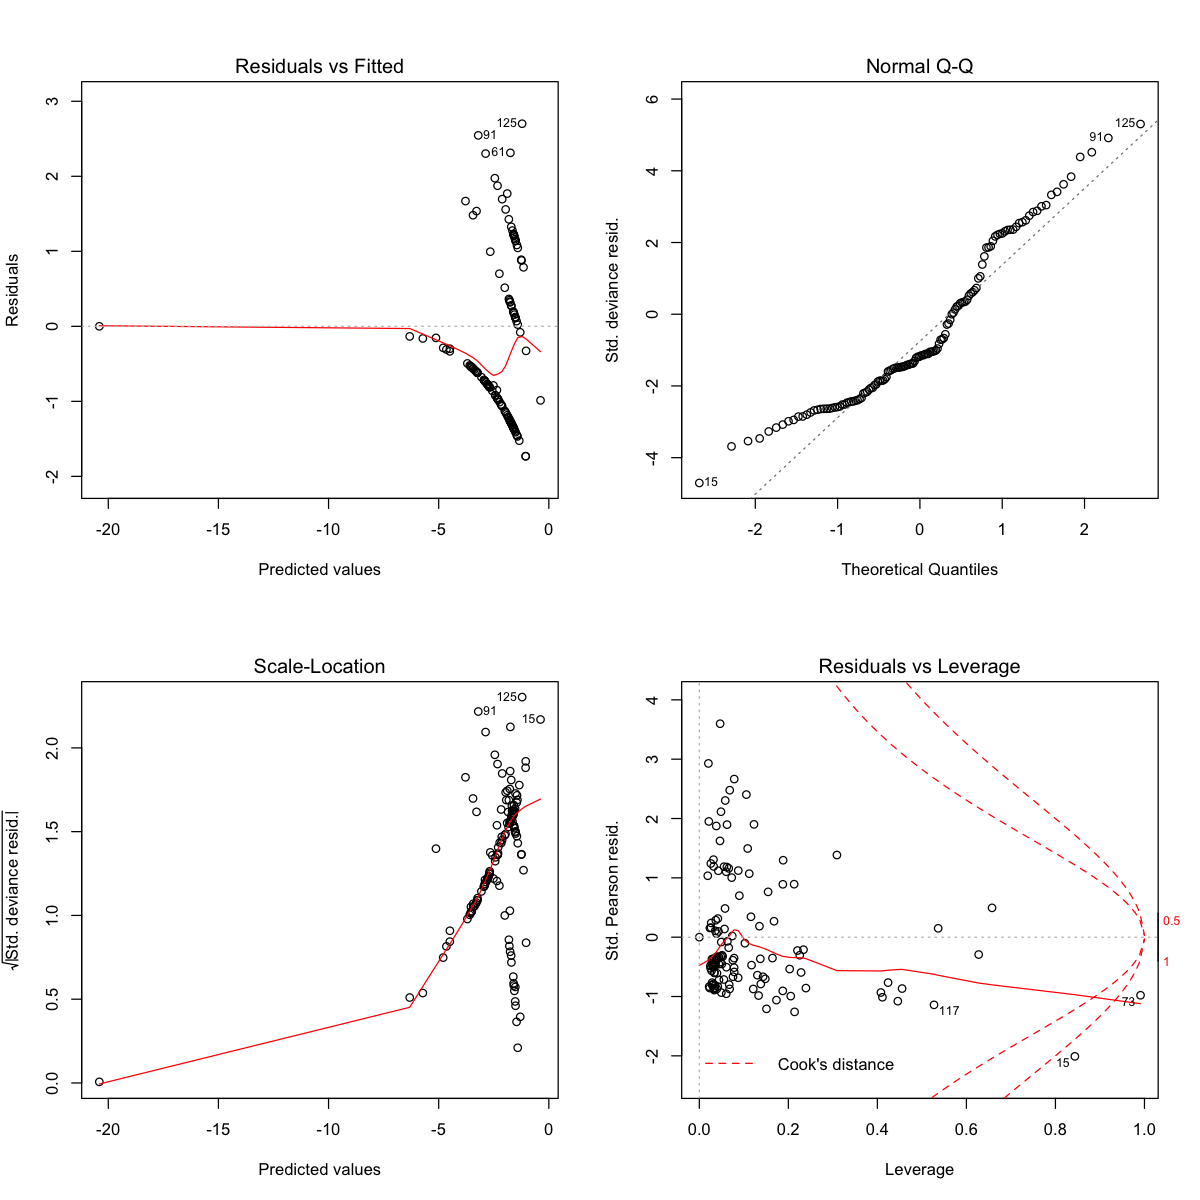

In [249]:
summary(fit_pois)
par(mfrow=c(2,2))
plot(fit_disp)

In [267]:
# drop1(fit_pois, test = "F")
fit_pois_0<-update(fit_pois,~. -time:sex:tOut:tInOp)

# drop1(fit_pois_0, test = "F")
fit_pois_1<-update(fit_pois_0,~. -time:tOut:tInOp)

# drop1(fit_pois_1, test = "F")
fit_pois_2<-update(fit_pois_1,~. -time:sex:tOut)

# drop1(fit_pois_2, test = "F")
fit_pois_3<-update(fit_pois_2,~. -time:sex:tInOp)

# drop1(fit_pois_3, test = "F")
fit_pois_4<-update(fit_pois_3,~. -time:tOut)

# drop1(fit_pois_4, test = "F")
fit_pois_5<-update(fit_pois_4,~. -sex:tOut:tInOp)

# drop1(fit_pois_5, test = "F")
fit_pois_6<-update(fit_pois_5,~. -tOut:tInOp)

# drop1(fit_pois_6, test = "F")
fit_pois_7<-update(fit_pois_6,~. -sex:tOut)

# drop1(fit_pois_7, test = "F")
fit_pois_8<-update(fit_pois_7,~. -tOut)

# drop1(fit_pois_8, test = "F")
fit_pois_9<-update(fit_pois_8,~. -time:tInOp)

# drop1(fit_pois_9, test = "F")
fit_pois_10<-update(fit_pois_9,~. -time:sex)

# drop1(fit_pois_10, test = "F")
fit_pois_11<-update(fit_pois_10,~. -time)

# drop1(fit_pois_11, test = "F")
fit_pois_12<-update(fit_pois_11,~. -sex:tInOp)

# drop1(fit_pois_12, test = "F")
fit_pois_121<-update(fit_pois_12,~. -tInOp)

In [268]:
summary(fit_pois_121)


Call:
glm(formula = clo ~ sex + offset(log(nobs)), family = quasipoisson, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3112  -0.7730  -0.7730   0.1476   2.4535  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.7607     0.1408 -12.505  < 2e-16 ***
sexmale      -1.0569     0.2871  -3.681 0.000335 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 1.189467)

    Null deviance: 168.34  on 135  degrees of freedom
Residual deviance: 149.63  on 134  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


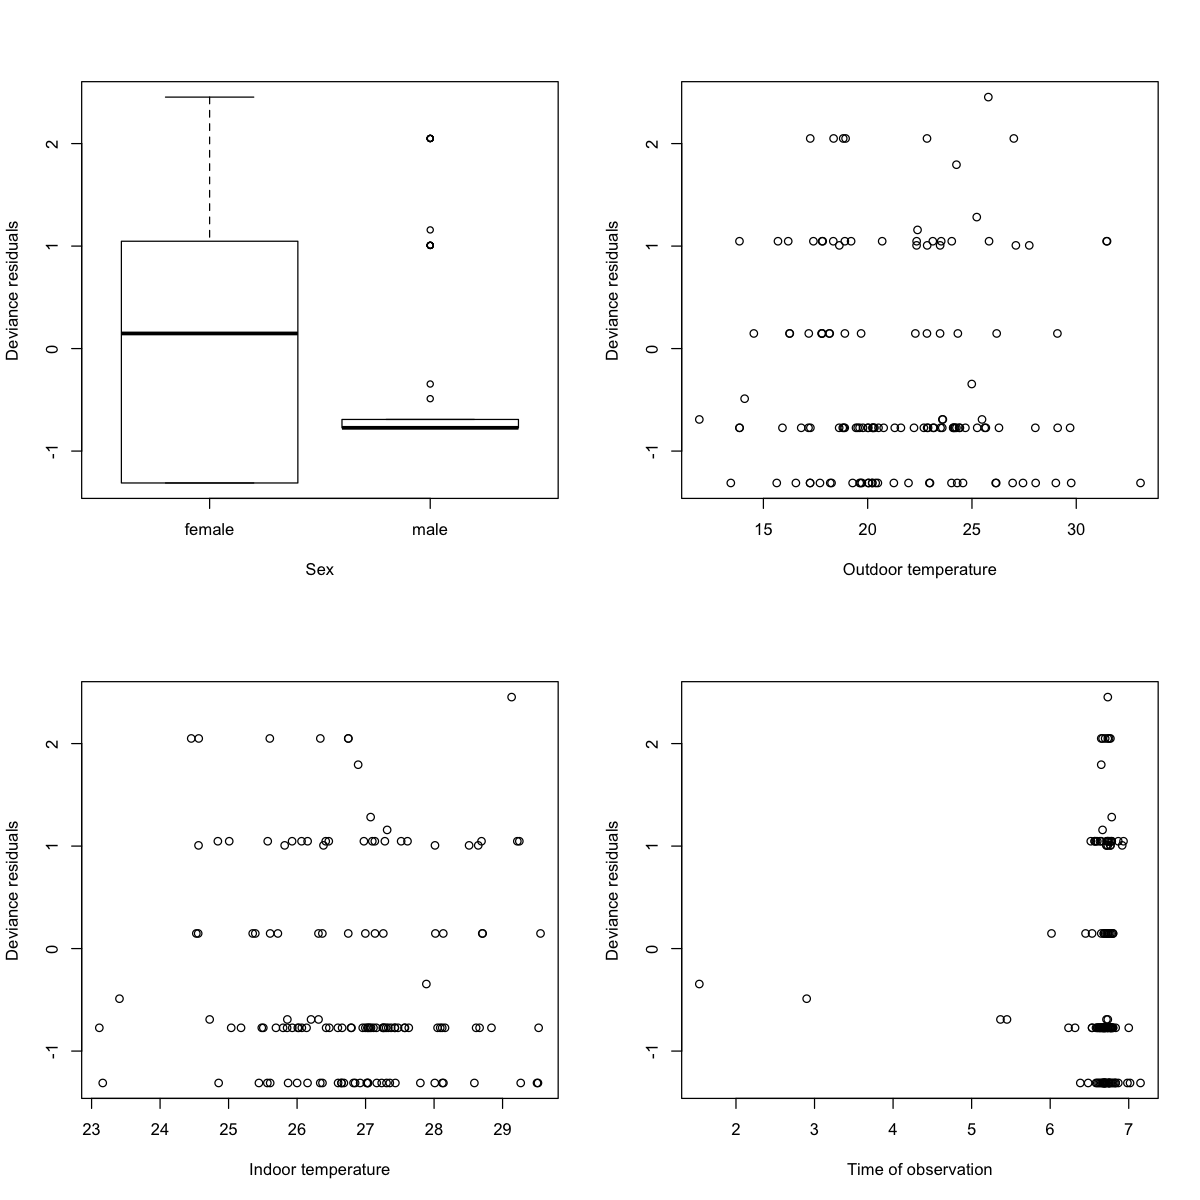

In [269]:
## Residual diagnostic on the model 
types <- c('deviance', 'pearson')
Rd<-residuals(fit_pois_121,type=types[1])

par(mfrow=c(2,2))
plot(data$sex,Rd, xlab='Sex', ylab='Deviance residuals')
plot(data$tOut,Rd, xlab='Outdoor temperature', ylab='Deviance residuals')
plot(data$tInOp,Rd, xlab='Indoor temperature', ylab='Deviance residuals')
plot(data$time,Rd, xlab='Time of observation', ylab='Deviance residuals')

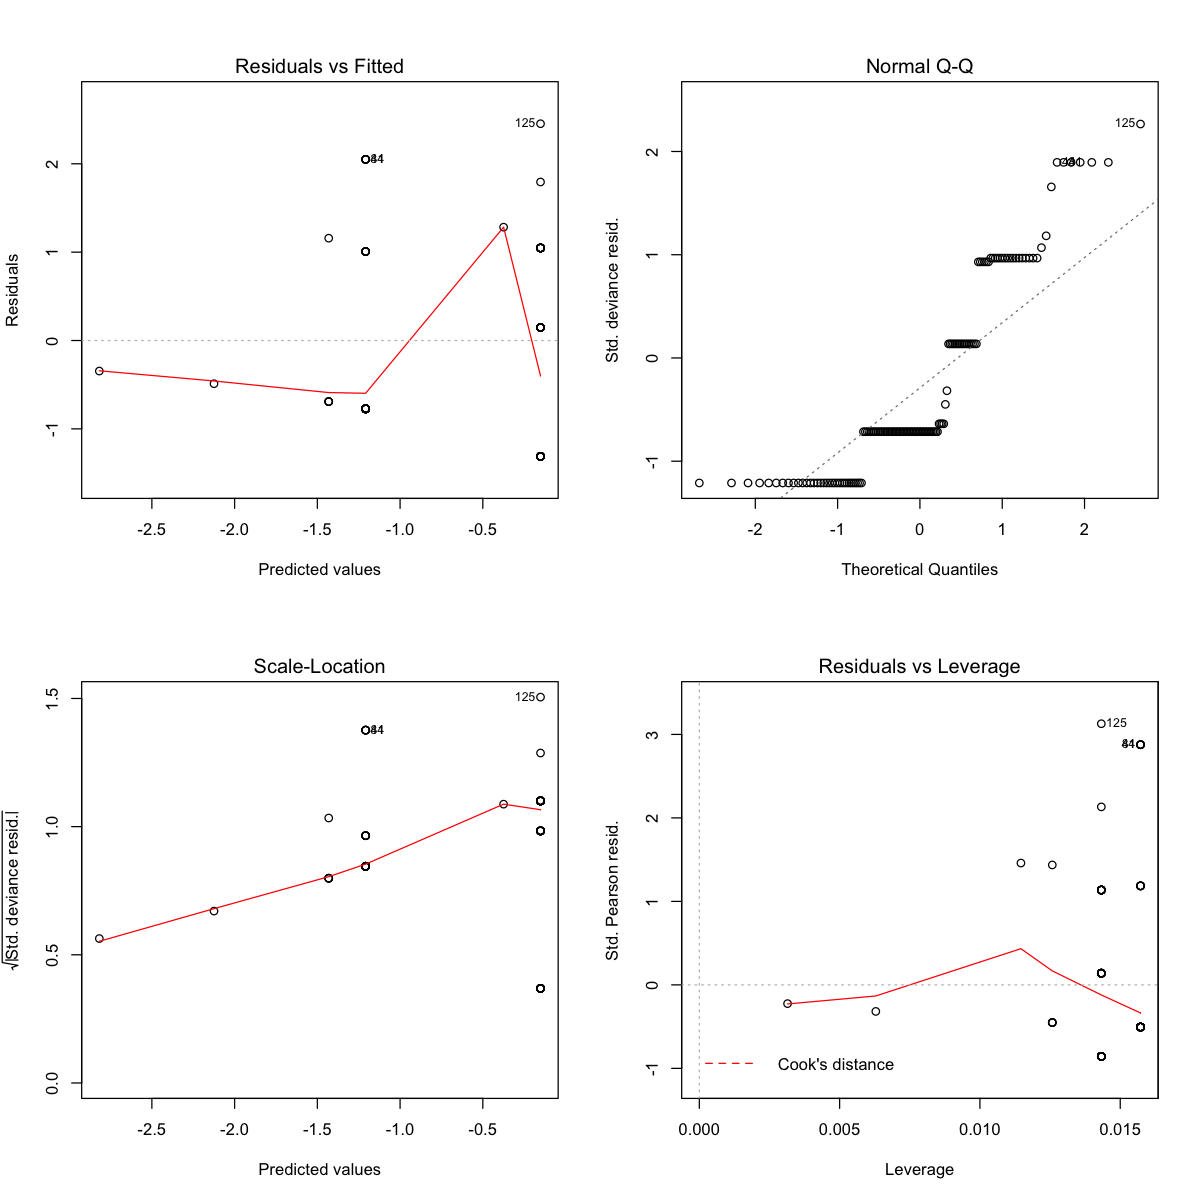

In [270]:
par(mfrow=c(2,2))
plot(fit_pois_121)

In [271]:
## Interpretation of parameters
par <- coef(fit_pois_121)
par

std<-sqrt(diag(vcov(fit_pois_121)))
std

(Intercept)     sexmale 
  -1.760727   -1.056885

(Intercept)     sexmale 
  0.1407993   0.2871027

In [272]:
## CI of parameters (Using t-dist)
par+std%o%c(lower=-1,upper=1)*qt(0.975,19)

## CI of parameters (Using normal dist)
confint.default(fit_pois_121)
# or with profile likelihood
confint(fit_pois_121) ## profile likelihood based

,lower,upper
(Intercept),-2.055424,-1.4660309
sexmale,-1.657798,-0.4559721


,2.5 %,97.5 %
(Intercept),-2.036689,-1.484766
sexmale,-1.619596,-0.494174


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-2.049999,-1.4969057
sexmale,-1.651265,-0.5177315


In [273]:
# Odds ratio
exp(coef(fit_pois_121)[2])
exp(confint(fit_pois_121)[2, ]) ## 95% confidence interval

sexmale 
0.3475367

Waiting for profiling to be done...


2.5 %    97.5 % 
0.1918072 0.5958708

#### Considering that the number of observations is small (i.e ranging from 1 to 5), we can not expect a nice alignment along the straight line for model's residuals (i.e proving the normal distribution of residuals).
#### The model comprises of just 2 levels of prediction (i.e males and females), than vary based on the number of observations.

### Overdispersion concept that has been applied:
1. Logit link function is applied.
2. There are a few outliers, but their number is insignificant to affect the overall model.
3. The variation within sexes is higher than we would have expected for the binomial distribution (i.e if assuming that the samples are independent, having equal probability).
4. Thus, a dispersion parameter (sigma^2) is included in the model (i.e quasibinomial distribution family is used). For the variance of the model, we apply Var[Y[i]] = (sigma^2)*V(mean[i])/w[i], where (sigma^2) denotes the overdispersion.
5. The dispersion parameter affects the distribution of the test statistics, while it does not affect the estimation of the mean value parameters (i.e beta[i]) or the standard error of beta[i].

#### Aditional data related notes:
1. The binomial model overdispersion can be explained by variation between the response probabilities or correlation between the binary responses (i.e the level of clothing changes for sex). #NB! No particular way of counting the below listed effects in the mean value structrure.
    1. The number of changes in the level of clothing for a particular sex is not homogenous.
    2. The samples were not recorded at similar experimental conditions (i.e tOut, tInOp, time).
    3. There might be some other expernal factors causing an increase in the change of the level of clothing (i.e a sudden rain, etc.)
2. The residual deviance can't be used as a goodness of fit in the case of overdispersion (i.e we have already used the residual deviance to estimate the overdispersion).
3. Quasibinomial differs from binomial in terms of that the dispersion parameter is not fixed at 1, so that overdispersion can be modeled.

#### Model results:
1. Probability of changing the clothing level (exp(-1.761) / (1 + exp(-1.761))) ~ 14.667% for females.
2. Probability of changing the clothing level (exp(-1.761-1.057) / (1 + exp(-1.761-1.057))) ~ 5.636% for males.
3. The odds ration becomes odds(clo | sexmale) / odds(clo | sexfemale) = 0.348, with a confidence interval [0.192,0.596].

### Interpretation of the binomial and poisson models
1. The probability of changing the clothing level for females is larger for the binomial model (i.e 17.193% compared to 14.667%) per nobs.
2. The probability of changing the clothing level for males is larger for the binomial model (i.e 5.975% compared to 5.636%) per nobs.
3. The odds ration for changing the level of clothing given that a subjectId is male relative to being female is lower for the binomial model compared to the poisson model (i.e 0.306 compared to 0.348) per nobs.

#### Model results
1. Probability of changing the clothing level (exp(-1.572) / (1 + exp(-1.572))) ~ 17.193% for females.
2. Probability of changing the clothing level (exp(-1.572-1.184) / (1 + exp(-1.572-1.184))) ~ 5.975% for males.
3. The odds ration becomes odds(clo | sexmale) / odds(clo | sexfemale) = 0.306, with a confidence interval [0.158,0.559].

## Exclude sex and consider subjectId

In [195]:
library(lmerTest); suppressWarnings(suppressMessages(library("lmerTest")))

In [236]:
## Importing and visualizing data
setwd("~/Desktop/DTU/Advanced\ Dataanalysis\ and\ Statistical\ Modelling/Assignments/Assignment\ 2")
data <- read.table("dat_count.csv", sep = ";",  header = TRUE)
summary(data)

     subjId           day             clo              time      
 Min.   : 11.0   Min.   :1.000   Min.   :0.0000   Min.   :1.533  
 1st Qu.: 59.0   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:6.650  
 Median : 99.0   Median :2.000   Median :0.0000   Median :6.717  
 Mean   :101.1   Mean   :1.978   Mean   :0.5809   Mean   :6.617  
 3rd Qu.:141.0   3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:6.767  
 Max.   :199.0   Max.   :4.000   Max.   :4.0000   Max.   :7.150  
      nobs           sex          tOut           tInOp      
 Min.   :1.000   female:70   Min.   :11.93   Min.   :23.11  
 1st Qu.:5.000   male  :66   1st Qu.:18.57   1st Qu.:26.01  
 Median :5.000               Median :21.01   Median :26.94  
 Mean   :4.904               Mean   :21.54   Mean   :26.82  
 3rd Qu.:5.000               3rd Qu.:24.25   3rd Qu.:27.48  
 Max.   :5.000               Max.   :33.08   Max.   :29.55  

### Binomial distribution (Mixed general linear model, subjId as the random effect term)

In [197]:
data$resp <- cbind(data$clo, (data$nobs - data$clo))
fit_binom <- glmer(resp ~ tOut + tInOp + time + (1 | subjId), family = binomial, data = data)
summary(fit_binom)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ tOut + tInOp + time + (1 | subjId)
   Data: data

     AIC      BIC   logLik deviance df.resid 
   277.5    292.0   -133.7    267.5      131 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4444 -0.5146 -0.4485  0.5147  2.4346 

Random effects:
 Groups Name        Variance Std.Dev.
 subjId (Intercept) 1.233    1.11    
Number of obs: 136, groups:  subjId, 47

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.523721   6.111597  -0.413    0.680
tOut         0.007281   0.045369   0.160    0.872
tInOp       -0.100618   0.157606  -0.638    0.523
time         0.394121   0.715322   0.551    0.582

Correlation of Fixed Effects:
      (Intr) tOut   tInOp 
tOut   0.206              
tInOp -0.619 -0.458       
time  -0.776 -0.066  0.007

In [198]:
# drop1(fit_binom, test = "Chisq")
fit_binom_1<-update(fit_binom,~. -tOut)

# drop1(fit_binom_1, test = "Chisq")
fit_binom_2<-update(fit_binom_1,~. -time)

# drop1(fit_binom_2, test = "Chisq")
fit_binom_3<-update(fit_binom_2,~. -tInOp)

summary(fit_binom_3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ (1 | subjId)
   Data: data

     AIC      BIC   logLik deviance df.resid 
   272.3    278.1   -134.1    268.3      134 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5026 -0.4980 -0.4590  0.5416  2.3616 

Random effects:
 Groups Name        Variance Std.Dev.
 subjId (Intercept) 1.222    1.106   
Number of obs: 136, groups:  subjId, 47

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.4258     0.2525  -9.609   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Binomial distribution (General linear model,all terms are fixed effect)

In [216]:
data$resp <- cbind(data$clo, (data$nobs - data$clo))
fit_binom_glm <- glm(resp ~ tOut + tInOp + time + factor(subjId), family = quasibinomial, data = data)
summary(fit_binom_glm)


Call:
glm(formula = resp ~ tOut + tInOp + time + factor(subjId), family = quasibinomial, 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.37275  -0.41825  -0.00007   0.13993   1.92933  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)       -1.409e+01  6.310e+03  -0.002    0.998
tOut               1.948e-02  4.919e-02   0.396    0.693
tInOp             -2.671e-01  1.920e-01  -1.392    0.168
time              -1.449e-01  8.319e-01  -0.174    0.862
factor(subjId)17   1.942e+01  6.310e+03   0.003    0.998
factor(subjId)19   2.078e+01  6.310e+03   0.003    0.997
factor(subjId)29   2.190e-01  8.921e+03   0.000    1.000
factor(subjId)35   1.914e+01  6.310e+03   0.003    0.998
factor(subjId)43   2.159e+01  6.310e+03   0.003    0.997
factor(subjId)47   1.955e+01  6.310e+03   0.003    0.998
factor(subjId)49   3.852e-02  9.979e+03   0.000    1.000
factor(subjId)51   1.995e+01  6.310e+03   0.003    0.997
factor(subjI

In [219]:
# drop1(fit_binom_glm, test = "Chisq")
fit_binom_glm_1<-update(fit_binom_glm,~. -tInOp)

# drop1(fit_binom_glm_1, test = "Chisq")
fit_binom_glm_2<-update(fit_binom_glm_1,~. -tOut)

# drop1(fit_binom_glm_2, test = "Chisq")
fit_binom_glm_3<-update(fit_binom_glm_2,~. -time)

drop1(fit_binom_glm_3, test = "Chisq")
summary(fit_binom_glm_3)

,Df,Deviance,scaled dev.,Pr(>Chi)
<none>,NA,75.41024,NA,NA
factor(subjId),46,193.65503,167.0192,1.230425e-15



Call:
glm(formula = resp ~ factor(subjId), family = quasibinomial, 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.26015  -0.34746  -0.00007   0.00000   1.82974  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)       -2.154e+01  6.258e+03  -0.003    0.997
factor(subjId)17   1.966e+01  6.258e+03   0.003    0.997
factor(subjId)19   2.084e+01  6.258e+03   0.003    0.997
factor(subjId)29   3.011e-08  8.850e+03   0.000    1.000
factor(subjId)35   1.859e+01  6.258e+03   0.003    0.998
factor(subjId)43   2.095e+01  6.258e+03   0.003    0.997
factor(subjId)47   1.890e+01  6.258e+03   0.003    0.998
factor(subjId)49   3.011e-08  9.894e+03   0.000    1.000
factor(subjId)51   1.966e+01  6.258e+03   0.003    0.997
factor(subjId)55   1.966e+01  6.258e+03   0.003    0.997
factor(subjId)57   2.052e+01  6.258e+03   0.003    0.997
factor(subjId)59   1.897e+01  6.258e+03   0.003    0.998
factor(subjId)61   3.011e-08  8.85

In [224]:
## Interpretation of parameters
par <- coef(fit_binom_glm_3)
par

(Intercept)  factor(subjId)17  factor(subjId)19  factor(subjId)29 
    -2.153650e+01      1.966470e+01      2.084335e+01      3.010699e-08 
 factor(subjId)35  factor(subjId)43  factor(subjId)47  factor(subjId)49 
     1.859206e+01      2.094871e+01      1.889744e+01      3.010695e-08 
 factor(subjId)51  factor(subjId)55  factor(subjId)57  factor(subjId)59 
     1.966470e+01      1.966470e+01      2.052490e+01      1.897155e+01 
 factor(subjId)61  factor(subjId)63  factor(subjId)65  factor(subjId)69 
     3.010695e-08      2.084335e+01      1.889744e+01      1.966470e+01 
 factor(subjId)71  factor(subjId)75  factor(subjId)85  factor(subjId)87 
     3.010697e-08      8.326054e-02      3.010694e-08      1.974474e+01 
 factor(subjId)89  factor(subjId)91  factor(subjId)93  factor(subjId)99 
     3.010691e-08      3.010697e-08      3.010692e-08      3.010694e-08 
factor(subjId)105 factor(subjId)107 factor(subjId)111 factor(subjId)113 
     3.010694e-08      3.530238e-01      2.015021e+01      2.015021e+01 
factor(subjId)119 factor(subjId)123 factor(subjId)125 factor(subjId)127 
     3.010695e-08      3.010698e-08      2.052490e+01      3.010694e-08 
factor(subjId)129 factor(subjId)137 factor(subjId)141 factor(subjId)145 
     3.010697e-08      2.015021e+01      2.113103e+01      2.028374e+01 
factor(subjId)149 factor(subjId)153 factor(subjId)157 factor(subjId)167 
     1.966470e+01      3.010696e-08      2.052490e+01      1.966470e+01 
factor(subjId)171 factor(subjId)173 factor(subjId)183 factor(subjId)187 
     1.966470e+01      2.052490e+01      3.010702e-08      2.113103e+01 
factor(subjId)189 factor(subjId)193 factor(subjId)199 
     1.933928e+01      2.113103e+01      1.889744e+01

In [225]:
std<-sqrt(diag(vcov(fit_binom_glm_3)))
std

(Intercept)  factor(subjId)17  factor(subjId)19  factor(subjId)29 
         6257.581          6257.581          6257.581          8849.556 
 factor(subjId)35  factor(subjId)43  factor(subjId)47  factor(subjId)49 
         6257.581          6257.581          6257.581          9894.104 
 factor(subjId)51  factor(subjId)55  factor(subjId)57  factor(subjId)59 
         6257.581          6257.581          6257.581          6257.581 
 factor(subjId)61  factor(subjId)63  factor(subjId)65  factor(subjId)69 
         8849.556          6257.581          6257.581          6257.581 
 factor(subjId)71  factor(subjId)75  factor(subjId)85  factor(subjId)87 
         9894.104          9960.212          8849.556          6257.581 
 factor(subjId)89  factor(subjId)91  factor(subjId)93  factor(subjId)99 
         8849.556          8849.556          8849.556          8849.556 
factor(subjId)105 factor(subjId)107 factor(subjId)111 factor(subjId)113 
         8849.556          8575.856          6257.581          6257.581 
factor(subjId)119 factor(subjId)123 factor(subjId)125 factor(subjId)127 
         8849.556          8849.556          6257.581          8849.556 
factor(subjId)129 factor(subjId)137 factor(subjId)141 factor(subjId)145 
         8849.556          6257.581          6257.581          6257.581 
factor(subjId)149 factor(subjId)153 factor(subjId)157 factor(subjId)167 
         6257.581          8849.556          6257.581          6257.581 
factor(subjId)171 factor(subjId)173 factor(subjId)183 factor(subjId)187 
         6257.581          6257.581          8849.556          6257.581 
factor(subjId)189 factor(subjId)193 factor(subjId)199 
         6257.581          6257.581          6257.581

In [222]:
## CI of parameters (Using t-dist)
par+std%o%c(lower=-1,upper=1)*qt(0.975,19)

## CI of parameters (Using normal dist)
confint.default(fit_binom_glm_3)
# or with profile likelihood
confint(fit_binom_glm_3) ## profile likelihood based

,lower,upper
(Intercept),-13118.80,13075.73
factor(subjId)17,-13077.60,13116.93
factor(subjId)19,-13076.42,13118.11
factor(subjId)29,-18522.33,18522.33
factor(subjId)35,-13078.68,13115.86
factor(subjId)43,-13076.32,13118.22
factor(subjId)47,-13078.37,13116.17
factor(subjId)49,-20708.60,20708.60
factor(subjId)51,-13077.60,13116.93
factor(subjId)55,-13077.60,13116.93


,2.5 %,97.5 %
(Intercept),-12286.17,12243.10
factor(subjId)17,-12244.97,12284.30
factor(subjId)19,-12243.79,12285.48
factor(subjId)29,-17344.81,17344.81
factor(subjId)35,-12246.04,12283.23
factor(subjId)43,-12243.68,12285.58
factor(subjId)47,-12245.74,12283.53
factor(subjId)49,-19392.09,19392.09
factor(subjId)51,-12244.97,12284.30
factor(subjId)55,-12244.97,12284.30


Waiting for profiling to be done...
Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not c

,2.5 %,97.5 %
(Intercept),NA,341.8042
factor(subjId)17,-183.3554,2507.3260
factor(subjId)19,-227.7739,2258.5625
factor(subjId)29,-167.4300,154.1533
factor(subjId)35,-209.2662,2370.1020
factor(subjId)43,-187.6484,2478.0394
factor(subjId)47,298.1596,2550.7454
factor(subjId)49,-134.6915,181.0711
factor(subjId)51,-216.2893,2326.7978
factor(subjId)55,-180.3215,2523.9564


#### Model results:
1. Probability of changing the clothing level (exp(-21.536+19.665) / (1 + exp(-21.536+19.665))) ~ 13.343% for subjectId17.
2. Probability of changing the clothing level (exp(-21.536+20.843) / (1 + exp(-21.536+20.843))) ~ 33.337% for subjectId19.
3. The odds ration becomes odds(clo | subjectId17) / odds(clo | subjectId19) = 0.400.

### Poisson distribution

In [245]:
fit_poisson <- glmer(clo ~ offset(log(nobs)) + time + tOut + tInOp + (1 | subjId), family = poisson, data = data)
summary(fit_poisson)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00360028 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?”

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: clo ~ offset(log(nobs)) + time + tOut + tInOp + (1 | subjId)
   Data: data

     AIC      BIC   logLik deviance df.resid 
   279.8    294.4   -134.9    269.8      131 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1489 -0.5444 -0.4892  0.5538  2.2306 

Random effects:
 Groups Name        Variance Std.Dev.
 subjId (Intercept) 0.7178   0.8472  
Number of obs: 136, groups:  subjId, 47

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -3.335065   5.449458  -0.612    0.541
time         0.388913   0.656819   0.592    0.554
tOut         0.003759   0.039429   0.095    0.924
tInOp       -0.067669   0.134899  -0.502    0.616

Correlation of Fixed Effects:
      (Intr) time   tOut  
time  -0.798              
tOut   0.209 -0.065       
tInOp -0.589  0.005 -0.474
convergence code: 0
Model failed to converge with max|grad| = 0

In [247]:
# drop1(fit_poisson, test = "Chisq")
fit_poisson_0<-update(fit_poisson,~. -time)

# drop1(fit_poisson_0, test = "Chisq")
fit_poisson_1<-update(fit_poisson_0,~. -tOut)

# drop1(fit_poisson_1, test = "Chisq")
fit_poisson_2<-update(fit_poisson_1,~. -tInOp)

summary(fit_poisson_2)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00119691 (tol = 0.001, component 1)”

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: clo ~ (1 | subjId) + offset(log(nobs))
   Data: data

     AIC      BIC   logLik deviance df.resid 
   274.5    280.3   -135.3    270.5      134 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1980 -0.5312 -0.4980  0.5812  2.1408 

Random effects:
 Groups Name        Variance Std.Dev.
 subjId (Intercept) 0.7202   0.8486  
Number of obs: 136, groups:  subjId, 47

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.4682     0.2148  -11.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Poisson distribution (General linear model,all terms are fixed effect)

In [238]:
fit_poisson_glm <- glm(clo ~ offset(log(nobs)) + time + tOut + tInOp + factor(subjId), family = quasipoisson, data = data)
summary(fit_poisson_glm)


Call:
glm(formula = clo ~ offset(log(nobs)) + time + tOut + tInOp + 
    factor(subjId), family = quasipoisson, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.09595  -0.35705  -0.00006   0.10672   1.43336  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)       -1.614e+01  6.867e+03  -0.002    0.998
time              -1.255e-01  6.836e-01  -0.184    0.855
tOut               1.598e-02  3.915e-02   0.408    0.684
tInOp             -2.042e-01  1.512e-01  -1.351    0.180
factor(subjId)17   1.971e+01  6.867e+03   0.003    0.998
factor(subjId)19   2.077e+01  6.867e+03   0.003    0.998
factor(subjId)29   1.631e-01  9.710e+03   0.000    1.000
factor(subjId)35   1.933e+01  6.867e+03   0.003    0.998
factor(subjId)43   2.135e+01  6.867e+03   0.003    0.998
factor(subjId)47   1.970e+01  6.867e+03   0.003    0.998
factor(subjId)49   3.080e-02  1.086e+04   0.000    1.000
factor(subjId)51   2.011e+01  6.867e+03   0.003    

In [240]:
# drop1(fit_poisson_glm, test = "F")
fit_poisson_glm_0<-update(fit_poisson_glm,~. -time)

# drop1(fit_poisson_glm_0, test = "F")
fit_poisson_glm_1<-update(fit_poisson_glm_0,~. -tInOp)

# drop1(fit_poisson_glm_1, test = "F")
fit_poisson_glm_2<-update(fit_poisson_glm_1,~. -tOut)

summary(fit_poisson_glm_2)


Call:
glm(formula = clo ~ factor(subjId) + offset(log(nobs)), family = quasipoisson, 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.00000  -0.30216  -0.00006   0.00000   1.31445  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)       -2.191e+01  6.808e+03  -0.003    0.997
factor(subjId)17   1.990e+01  6.808e+03   0.003    0.998
factor(subjId)19   2.081e+01  6.808e+03   0.003    0.998
factor(subjId)29  -4.949e-08  9.627e+03   0.000    1.000
factor(subjId)35   1.892e+01  6.808e+03   0.003    0.998
factor(subjId)43   2.088e+01  6.808e+03   0.003    0.998
factor(subjId)47   1.920e+01  6.808e+03   0.003    0.998
factor(subjId)49  -4.949e-08  1.076e+04   0.000    1.000
factor(subjId)51   1.990e+01  6.808e+03   0.003    0.998
factor(subjId)55   1.990e+01  6.808e+03   0.003    0.998
factor(subjId)57   2.059e+01  6.808e+03   0.003    0.998
factor(subjId)59   1.927e+01  6.808e+03   0.003    0.998
factor(subjId)61

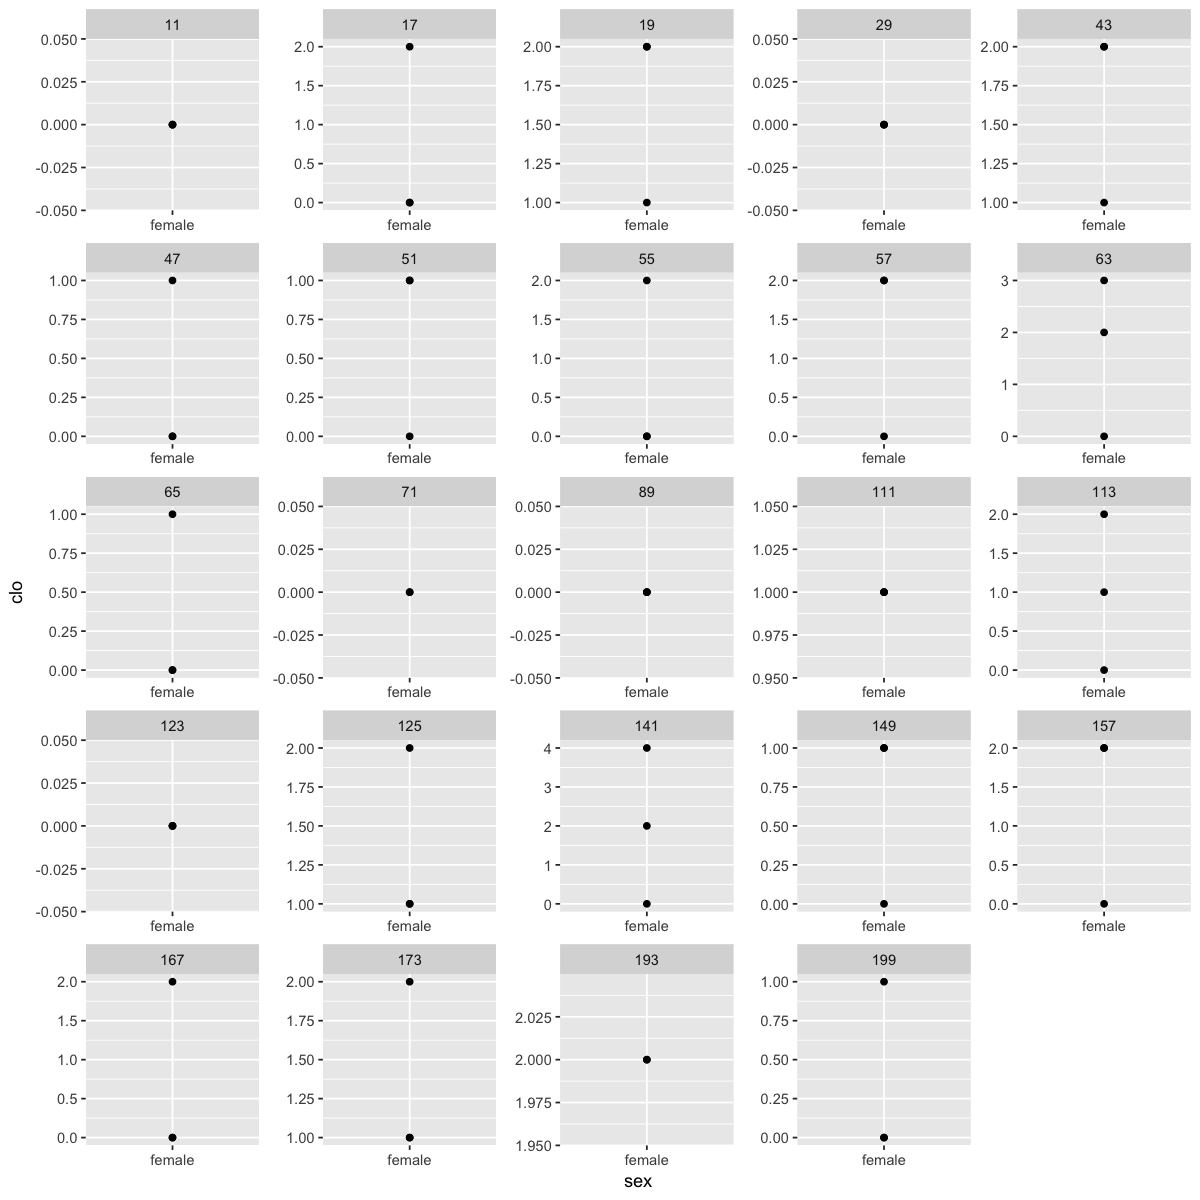

In [241]:
options(repr.plot.width=10, repr.plot.height=10)
fem <- subset(data, (sex == 'female'));
male <- subset(data, (sex == 'male'));

(ggplot(fem, aes(x=sex, y=clo))
     #tell ggplot what data is, and x and y variables
     +facet_wrap(~subjId, ncol=5, scales='free')
     #add a wrapping by unique combos of 2 variable
     #set num columns, and vary scales per facet.
     +geom_point()
     #add the points as representations
     +stat_smooth(method='lm', aes(group=1))
     #add the linear fits.
)

In [242]:
## Interpretation of parameters
par <- coef(fit_poisson_glm_2)
par

std<-sqrt(diag(vcov(fit_poisson_glm_2)))
std

(Intercept)  factor(subjId)17  factor(subjId)19  factor(subjId)29 
    -2.191202e+01      1.989712e+01      2.081341e+01     -4.948596e-08 
 factor(subjId)35  factor(subjId)43  factor(subjId)47  factor(subjId)49 
     1.891629e+01      2.088240e+01      1.920397e+01     -4.948596e-08 
 factor(subjId)51  factor(subjId)55  factor(subjId)57  factor(subjId)59 
     1.989712e+01      1.989712e+01      2.059027e+01      1.927297e+01 
 factor(subjId)61  factor(subjId)63  factor(subjId)65  factor(subjId)69 
    -4.948599e-08      2.081341e+01      1.920397e+01      1.989712e+01 
 factor(subjId)71  factor(subjId)75  factor(subjId)85  factor(subjId)87 
    -4.948595e-08      1.115717e-01     -4.948598e-08      1.996611e+01 
 factor(subjId)89  factor(subjId)91  factor(subjId)93  factor(subjId)99 
    -4.948601e-08     -4.948598e-08     -4.948598e-08     -4.948596e-08 
factor(subjId)105 factor(subjId)107 factor(subjId)111 factor(subjId)113 
    -4.948598e-08      6.872180e-01      2.030259e+01      2.030259e+01 
factor(subjId)119 factor(subjId)123 factor(subjId)125 factor(subjId)127 
    -4.948596e-08     -4.948595e-08      2.059027e+01     -4.948597e-08 
factor(subjId)129 factor(subjId)137 factor(subjId)141 factor(subjId)145 
    -4.948596e-08      2.030259e+01      2.099573e+01      2.040795e+01 
factor(subjId)149 factor(subjId)153 factor(subjId)157 factor(subjId)167 
     1.989712e+01     -4.948596e-08      2.059027e+01      1.989712e+01 
factor(subjId)171 factor(subjId)173 factor(subjId)183 factor(subjId)187 
     1.989712e+01      2.059027e+01     -4.948596e-08      2.099573e+01 
factor(subjId)189 factor(subjId)193 factor(subjId)199 
     1.960944e+01      2.099573e+01      1.920397e+01

(Intercept)  factor(subjId)17  factor(subjId)19  factor(subjId)29 
         6807.513          6807.513          6807.513          9627.277 
 factor(subjId)35  factor(subjId)43  factor(subjId)47  factor(subjId)49 
         6807.513          6807.513          6807.513         10763.622 
 factor(subjId)51  factor(subjId)55  factor(subjId)57  factor(subjId)59 
         6807.513          6807.513          6807.513          6807.513 
 factor(subjId)61  factor(subjId)63  factor(subjId)65  factor(subjId)69 
         9627.277          6807.513          6807.513          6807.513 
 factor(subjId)71  factor(subjId)75  factor(subjId)85  factor(subjId)87 
        10763.622         10743.609          9627.277          6807.513 
 factor(subjId)89  factor(subjId)91  factor(subjId)93  factor(subjId)99 
         9627.277          9627.277          9627.277          9627.277 
factor(subjId)105 factor(subjId)107 factor(subjId)111 factor(subjId)113 
         9627.277          8687.828          6807.513          6807.513 
factor(subjId)119 factor(subjId)123 factor(subjId)125 factor(subjId)127 
         9627.277          9627.277          6807.513          9627.277 
factor(subjId)129 factor(subjId)137 factor(subjId)141 factor(subjId)145 
         9627.277          6807.513          6807.513          6807.513 
factor(subjId)149 factor(subjId)153 factor(subjId)157 factor(subjId)167 
         6807.513          9627.277          6807.513          6807.513 
factor(subjId)171 factor(subjId)173 factor(subjId)183 factor(subjId)187 
         6807.513          6807.513          9627.277          6807.513 
factor(subjId)189 factor(subjId)193 factor(subjId)199 
         6807.513          6807.513          6807.513

In [243]:
## CI of parameters (Using t-dist)
par+std%o%c(lower=-1,upper=1)*qt(0.975,19)

## CI of parameters (Using normal dist)
confint.default(fit_poisson_glm_2)
# or with profile likelihood
confint(fit_poisson_glm_2) ## profile likelihood based

,lower,upper
(Intercept),-14270.20,14226.38
factor(subjId)17,-14228.39,14268.18
factor(subjId)19,-14227.47,14269.10
factor(subjId)29,-20150.12,20150.12
factor(subjId)35,-14229.37,14267.20
factor(subjId)43,-14227.41,14269.17
factor(subjId)47,-14229.08,14267.49
factor(subjId)49,-22528.52,22528.52
factor(subjId)51,-14228.39,14268.18
factor(subjId)55,-14228.39,14268.18


,2.5 %,97.5 %
(Intercept),-13364.39,13320.57
factor(subjId)17,-13322.58,13362.38
factor(subjId)19,-13321.67,13363.29
factor(subjId)29,-18869.12,18869.12
factor(subjId)35,-13323.56,13361.40
factor(subjId)43,-13321.60,13363.36
factor(subjId)47,-13323.28,13361.68
factor(subjId)49,-21096.31,21096.31
factor(subjId)51,-13322.58,13362.38
factor(subjId)55,-13322.58,13362.38


Waiting for profiling to be done...


ERROR: Error: no valid set of coefficients has been found: please supply starting values


#### Conclusion: The number of changes in the level of clothing varies based on the subjectId.

#### Model results:
1. Probability of changing the clothing level (exp(-21.912+19.897) / (1 + exp(-21.912+19.897))) ~ 11.763% for subjectId17.
2. Probability of changing the clothing level (exp(-21.912+20.813) / (1 + exp(-21.912+20.813))) ~ 24.993% for subjectId'.
3. The odds ration becomes odds(clo | subjectId17) / odds(clo | subjectId19) = 0.471.

### Interpretation of the binomial and poisson models
1. The probability of changing the clothing level for subjectId17 is larger for the binomial model (i.e 13.343% compared to 9.054%) per nobs.
2. The probability of changing the clothing level for subjectId' is larger for the binomial model (i.e 33.337% compared to 19.908%) per nobs.
3. The odds ratio for changing the level of clothing given subjectId17 relative to subjectId19 is larger for the poisson model compared to the binomial model (i.e 0.455 compared to 0.400) per nobs.